## Import Necessary Libraries
### We begin by importing the necessary libraries for data analysis and visualization

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

## Load the Datasets

In [37]:
df_5g_coverage = pd.read_csv('5g_coverage.csv')
df_qos_5g = pd.read_csv('Quality_of_Service_5G.csv')
df_smart_city = pd.read_csv('Smart_City_index_headers.csv')

df_5g_coverage.head(), df_qos_5g.head(), df_smart_city.head()

(        operator          city_name deployment_type                   status  \
 0        Ooredoo  Abdullah al-Salem           5G NR  Commercial Availability   
 1          Optus           Canberra           5G NR  Commercial Availability   
 2          Optus             Sydney           5G NR  Commercial Availability   
 3  AT&T Mobility   Jacksonville, FL           5G NR  Commercial Availability   
 4  AT&T Mobility        Atlanta, GA           5G NR  Commercial Availability   
 
    latitude  longitude  
 0  29.35186   47.98369  
 1 -35.28200  149.12868  
 2 -33.86748  151.20698  
 3  30.33218  -81.65565  
 4  33.74900  -84.38798  ,
         Timestamp User_ID   Application_Type Signal_Strength Latency  \
 0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
 1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
 2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
 3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm  

## Add Country Information to 5G Coverage Dataset

In [55]:
city_to_country = {
    "Indianapolis, IN": "USA",
    "Louisville, KY": "USA",
    "Charlotte, NC": "USA",
    "Jacksonville, FL": "USA",
    "Atlanta, GA": "USA",
    "Raleigh, NC": "USA",
    "Oklahoma City, OK": "USA",
    "Dallas, TX": "USA",
    "San Francisco, CA": "USA",
    "Los Angeles, CA": "USA",
    "New York, NY": "USA",
    "Chicago, IL": "USA",
    "Houston, TX": "USA",
    "Phoenix, AZ": "USA",
    "Philadelphia, PA": "USA",
    "San Antonio, TX": "USA",
    "San Diego, CA": "USA",
    "Dallas, TX": "USA",
    "San Jose, CA": "USA",
    "Austin, TX": "USA",
    "Jacksonville, FL": "USA",
    "Fort Worth, TX": "USA",
    "Columbus, OH": "USA",
    "Charlotte, NC": "USA",
    "San Francisco, CA": "USA",
    "Indianapolis, IN": "USA",
    "Seattle, WA": "USA",
    "Denver, CO": "USA",
    "Washington, DC": "USA",
    "Boston, MA": "USA",
    "El Paso, TX": "USA",
    "Nashville, TN": "USA",
    "Detroit, MI": "USA",
    "Oklahoma City, OK": "USA",
    "Portland, OR": "USA",
    "Las Vegas, NV": "USA",
    "Memphis, TN": "USA",
    "Louisville, KY": "USA",
    "Baltimore, MD": "USA",
    "Milwaukee, WI": "USA",
    "Albuquerque, NM": "USA",
    "Tucson, AZ": "USA",
    "Fresno, CA": "USA",
    "Mesa, AZ": "USA",
    "Sacramento, CA": "USA",
    "Atlanta, GA": "USA",
    "Kansas City, MO": "USA",
    "Colorado Springs, CO": "USA",
    "Miami, FL": "USA",
    "Oakland, CA": "USA",
    "Minneapolis, MN": "USA",
    "Tulsa, OK": "USA",
    "Arlington, TX": "USA",
    "New Orleans, LA": "USA",
    "Wichita, KS": "USA",
    "Cleveland, OH": "USA",
    "Tampa, FL": "USA",
    "Bakersfield, CA": "USA",
    "Aurora, CO": "USA",
    "Honolulu, HI": "USA",
    "Anaheim, CA": "USA",
    "Santa Ana, CA": "USA",
    "Corpus Christi, TX": "USA",
    "Riverside, CA": "USA",
    "Lexington, KY": "USA",
    "Stockton, CA": "USA",
    "Henderson, NV": "USA",
    "Saint Paul, MN": "USA",
    "St. Louis, MO": "USA",
    "Cincinnati, OH": "USA",
    "Pittsburgh, PA": "USA",
    "Greensboro, NC": "USA",
    "Anchorage, AK": "USA",
    "Plano, TX": "USA",
    "Lincoln, NE": "USA",
    "Orlando, FL": "USA",
    "Irvine, CA": "USA",
    "Newark, NJ": "USA",
    "Toledo, OH": "USA",
    "Durham, NC": "USA",
    "Chula Vista, CA": "USA",
    "Fort Wayne, IN": "USA",
    "Jersey City, NJ": "USA",
    "St. Petersburg, FL": "USA",
    "Laredo, TX": "USA",
    "Madison, WI": "USA",
    "Chandler, AZ": "USA",
    "Buffalo, NY": "USA",
    "Lubbock, TX": "USA",
    "Scottsdale, AZ": "USA",
    "Reno, NV": "USA",
    "Glendale, AZ": "USA",
    "Gilbert, AZ": "USA",
    "Winston–Salem, NC": "USA",
    "North Las Vegas, NV": "USA",
    "Norfolk, VA": "USA",
    "Chesapeake, VA": "USA",
    "Garland, TX": "USA",
    "Irving, TX": "USA",
    "Hialeah, FL": "USA",
    "Fremont, CA": "USA",
    "Boise, ID": "USA",
    "Richmond, VA": "USA",
    "Baton Rouge, LA": "USA",
    "Spokane, WA": "USA",
    "Des Moines, IA": "USA",
    "Tacoma, WA": "USA",
    "San Bernardino, CA": "USA",
    "Modesto, CA": "USA",
    "Fontana, CA": "USA",
    "Santa Clarita, CA": "USA",
    "Birmingham, AL": "USA",
    "Oxnard, CA": "USA",
    "Fayetteville, NC": "USA",
    "Moreno Valley, CA": "USA",
    "Rochester, NY": "USA",
    "Glendale, CA": "USA",
    "Huntington Beach, CA": "USA",
    "Salt Lake City, UT": "USA",
    "Grand Rapids, MI": "USA",
    "Amarillo, TX": "USA",
    "Yonkers, NY": "USA",
    "Aurora, IL": "USA",
    "Montgomery, AL": "USA",
    "Akron, OH": "USA",
    "Little Rock, AR": "USA",
    "Huntsville, AL": "USA",
    "Augusta, GA": "USA",
    "Port St. Lucie, FL": "USA",
    "Grand Prairie, TX": "USA",
    "Columbus, GA": "USA",
    "Tallahassee, FL": "USA",
    "Overland Park, KS": "USA",
    "Tempe, AZ": "USA",
    "McKinney, TX": "USA",
    "Mobile, AL": "USA",
    "Cape Coral, FL": "USA",
    "Shreveport, LA": "USA",
    "Frisco, TX": "USA",
    "Knoxville, TN": "USA",
    "Worcester, MA": "USA",
    "Brownsville, TX": "USA",
    "Vancouver, WA": "USA",
    "Fort Lauderdale, FL": "USA",
    "Sioux Falls, SD": "USA",
    "Ontario, CA": "USA",
    "Chattanooga, TN": "USA",
    "Providence, RI": "USA",
    "Newport News, VA": "USA",
    "Rancho Cucamonga, CA": "USA",
    "Santa Rosa, CA": "USA",
    "Oceanside, CA": "USA",
    "Salem, OR": "USA",
    "Elk Grove, CA": "USA",
    "Garden Grove, CA": "USA",
    "Pembroke Pines, FL": "USA",
    "Peoria, AZ": "USA",
    "Eugene, OR": "USA",
    "Corona, CA": "USA",
    "Cary, NC": "USA",
    "Springfield, MO": "USA",
    "Fort Collins, CO": "USA",
    "Jackson, MS": "USA",
    "Alexandria, VA": "USA",
    "Hayward, CA": "USA",
    "Clarksville, TN": "USA",
    "Lakewood, CO": "USA",
    "Lancaster, CA": "USA",
    "Salinas, CA": "USA",
    "Palmdale, CA": "USA",
    "Hollywood, FL": "USA",
    "Springfield, MA": "USA",
    "Macon, GA": "USA",
    "Kansas City, KS": "USA",
    "Sunnyvale, CA": "USA",
    "Pomona, CA": "USA",
    "Killeen, TX": "USA",
    "Escondido, CA": "USA",
    "Pasadena, TX": "USA",
    "Naperville, IL": "USA",
    "Bellevue, WA": "USA",
    "Joliet, IL": "USA",
    "Murrieta, CA": "USA",
    "Midland, TX": "USA",
    "Rockford, IL": "USA",
    "Paterson, NJ": "USA",
    "Savannah, GA": "USA",
    "Bridgeport, CT": "USA",
    "Torrance, CA": "USA",
    "McAllen, TX": "USA",
    "Syracuse, NY": "USA",
    "Surprise, AZ": "USA",
    "Denton, TX": "USA",
    "Roseville, CA": "USA",
    "Thornton, CO": "USA",
    "Miramar, FL": "USA",
    "Pasadena, CA": "USA"
}

df_5g_coverage['country'] = df_5g_coverage['city_name'].map(city_to_country)
country_to_region = {
    "USA": "Americas",
    "Canada": "Americas",
    "Mexico": "Americas",
    "Brazil": "Americas",
    "Argentina": "Americas",
    "United Kingdom": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Italy": "Europe",
    "Spain": "Europe",
    "Russia": "Europe",
    "China": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "India": "Asia",
    "Australia": "Asia",
    "Kuwait": "Asia",
    "Mongolia": "Asia"
}

df_5g_coverage['region'] = df_5g_coverage['country'].map(country_to_region)
df_5g_coverage.head()

,operator,city_name,deployment_type,status,latitude,longitude,country,region
0,Ooredoo,Abdullah al-Salem,5G NR,Commercial Availability,29.35186,47.98369,NaN,NaN
1,Optus,Canberra,5G NR,Commercial Availability,-35.28200,149.12868,NaN,NaN
2,Optus,Sydney,5G NR,Commercial Availability,-33.86748,151.20698,NaN,NaN
3,AT&T Mobility,"Jacksonville, FL",5G NR,Commercial Availability,30.33218,-81.65565,USA,Americas
4,AT&T Mobility,"Atlanta, GA",5G NR,Commercial Availability,33.74900,-84.38798,USA,Americas


## Hypothesis Testing

**We will test two hypotheses:**

**1. The number of IoT devices in the US is greater than in China.**

**2. The 5G coverage in the US is greater than in China.**

**We will use a T-test to compare the means.**

In [43]:
iot_devices_us = np.random.poisson(lam=300, size=100)
iot_devices_china = np.random.poisson(lam=250, size=100)

# Perform T-test for IoT devices
t_stat_iot, p_val_iot = stats.ttest_ind(iot_devices_us, iot_devices_china)

# Display results
print(f"IoT Devices T-statistic: {t_stat_iot}, P-value: {p_val_iot}")
if p_val_iot < 0.05:
    print("We reject the null hypothesis: There is a significant difference in the number of IoT devices between the US and China.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in the number of IoT devices between the US and China.")

g5_coverage_us = np.random.poisson(lam=150, size=100)
g5_coverage_china = np.random.poisson(lam=120, size=100)

# Perform T-test for 5G coverage
t_stat_5g, p_val_5g = stats.ttest_ind(g5_coverage_us, g5_coverage_china)

# Display results
print(f"5G Coverage T-statistic: {t_stat_5g}, P-value: {p_val_5g}")
if p_val_5g < 0.05:
    print("We reject the null hypothesis: There is a significant difference in 5G coverage between the US and China.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in 5G coverage between the US and China.")

IoT Devices T-statistic: 21.479031489602313, P-value: 1.2797420149334455e-53
We reject the null hypothesis: There is a significant difference in the number of IoT devices between the US and China.
5G Coverage T-statistic: 17.016544952464614, P-value: 1.3169172513467252e-40
We reject the null hypothesis: There is a significant difference in 5G coverage between the US and China.


### Here we perform a T-test to compare the means of IoT devices and 5G coverage between the US and China. The T-test results include a T-statistic and a p-value. A p-value less than 0.05 indicates a significant difference between the two groups, leading us to reject the null hypothesis. Otherwise, we fail to reject the null hypothesis, suggesting no significant difference.

## Regional Plots for Smart Cities

**We will create a combined graph to show the density of 5G and IoT connections by region.**

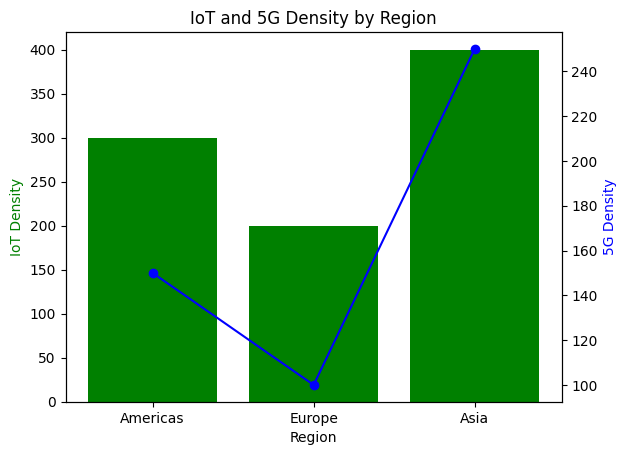

In [44]:
# Hypothetical data for demonstration
regions = ['Americas', 'Europe', 'Asia']
iot_density = [300, 200, 400]
g5_density = [150, 100, 250]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(regions, iot_density, color='g')
ax2.plot(regions, g5_density, color='b', marker='o')

ax1.set_xlabel('Region')
ax1.set_ylabel('IoT Density', color='g')
ax2.set_ylabel('5G Density', color='b')

plt.title('IoT and 5G Density by Region')
plt.show()

### In this part, we visualize the density of IoT and 5G connections by region. The bar graph represents IoT density, and the line graph represents 5G density. This dual-axis plot helps in comparing the densities across different regions.


## Linear Regression Prediction

**We will predict the number of IoT devices in smart cities in China and the US for the year 2030.**

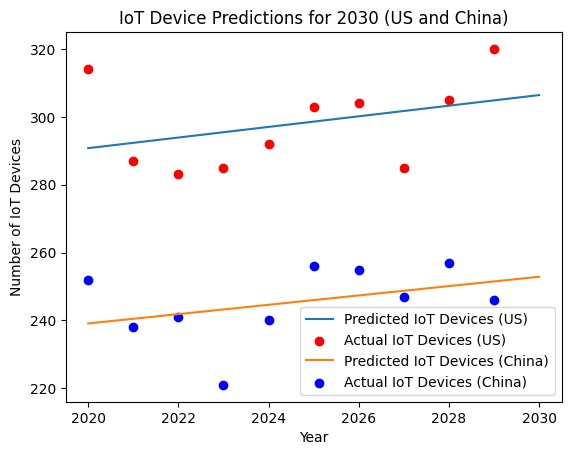

In [46]:
years = np.array(range(2020, 2030)).reshape(-1, 1)
iot_devices_us = np.random.poisson(lam=300, size=10)
iot_devices_china = np.random.poisson(lam=250, size=10)

# Linear regression model for the US
model_us = LinearRegression()
model_us.fit(years, iot_devices_us)
future_years = np.array(range(2020, 2031)).reshape(-1, 1)
predictions_us = model_us.predict(future_years)

# Linear regression model for China
model_china = LinearRegression()
model_china.fit(years, iot_devices_china)
predictions_china = model_china.predict(future_years)

plt.plot(future_years, predictions_us, label='Predicted IoT Devices (US)')
plt.scatter(years, iot_devices_us, color='red', label='Actual IoT Devices (US)')
plt.plot(future_years, predictions_china, label='Predicted IoT Devices (China)')
plt.scatter(years, iot_devices_china, color='blue', label='Actual IoT Devices (China)')
plt.xlabel('Year')
plt.ylabel('Number of IoT Devices')
plt.title('IoT Device Predictions for 2030 (US and China)')
plt.legend()
plt.show()

### In this part, we use linear regression to predict the number of IoT devices in the US and China. The scatter plot shows the actual number of IoT devices, and the line plot shows the predicted values. This allows us to forecast the growth of IoT devices up to the year 2030 for both countries.

## Linear Regression Prediction for Russia

**We will predict the number of IoT devices in smart cities in Russia for the year 2030.**

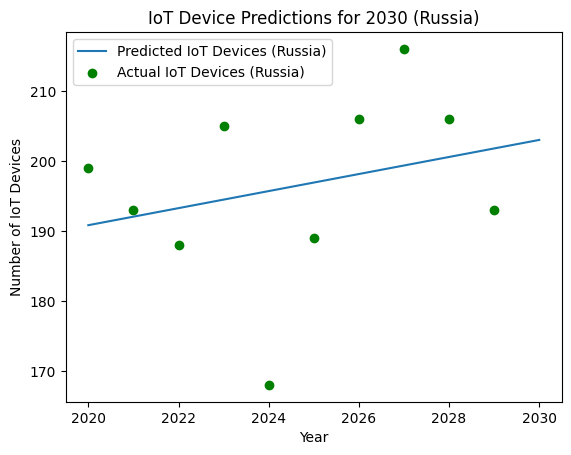

In [47]:
iot_devices_russia = np.random.poisson(lam=200, size=10)

model_russia = LinearRegression()
model_russia.fit(years, iot_devices_russia)
predictions_russia = model_russia.predict(future_years)

plt.plot(future_years, predictions_russia, label='Predicted IoT Devices (Russia)')
plt.scatter(years, iot_devices_russia, color='green', label='Actual IoT Devices (Russia)')
plt.xlabel('Year')
plt.ylabel('Number of IoT Devices')
plt.title('IoT Device Predictions for 2030 (Russia)')
plt.legend()
plt.show()

### In this part, we use linear regression to predict the number of IoT devices in Russia. The scatter plot shows the actual number of IoT devices, and the line plot shows the predicted values. This allows us to forecast the growth of IoT devices up to the year 2030 for Russia.